In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import yfinance as yf

In [3]:
df = yf.download('EURUSD=X', start='2012-01-01', end='2025-01-01')
df.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,,
2012-01-02 00:00:00+00:00,1.296008,1.296008,1.296395,1.292257,1.296008,0
2012-01-03 00:00:00+00:00,1.294096,1.294096,1.306592,1.293628,1.293628,0
2012-01-04 00:00:00+00:00,1.305602,1.305602,1.307395,1.290206,1.305398,0
2012-01-05 00:00:00+00:00,1.293142,1.293142,1.294297,1.278527,1.293092,0
2012-01-06 00:00:00+00:00,1.279607,1.279607,1.281296,1.270406,1.279296,0
2012-01-09 00:00:00+00:00,1.268038,1.268038,1.278494,1.267957,1.267957,0
2012-01-10 00:00:00+00:00,1.277596,1.277596,1.281706,1.274551,1.277596,0
2012-01-11 00:00:00+00:00,1.275185,1.275185,1.278838,1.267395,1.275429,0


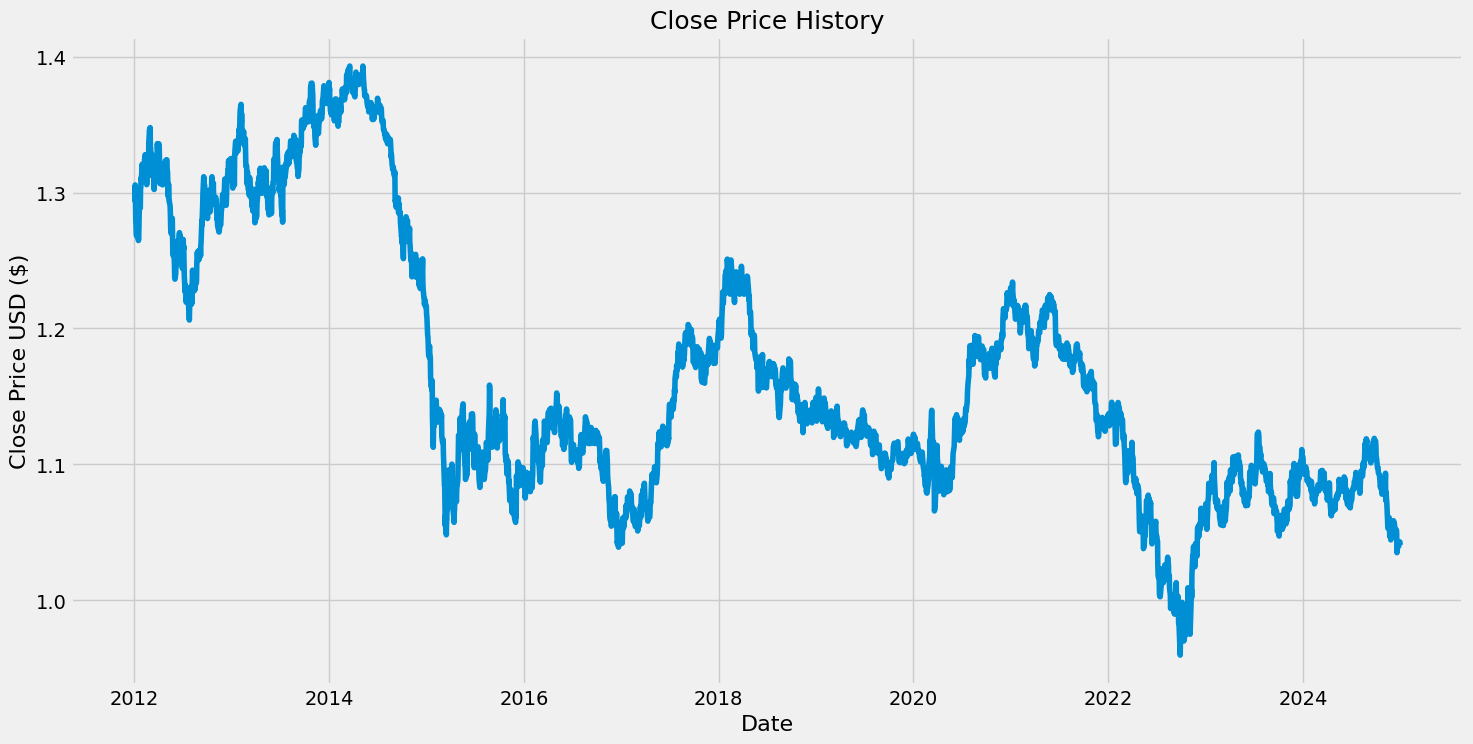

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.show()

In [ ]:
# Create a new DataFrame with only the 'Close' column
data = df[['Close']]

# Convert the DataFrame to a numpy array
dataset = data.values

# Define the training data length (80% of the dataset)
training_data_len = math.ceil(len(dataset) * 0.8)

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_data = scaled_data[:training_data_len, :]

# Split data into x_train and y_train
x_train = []
y_train = []
window_size = 300

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='huber')

# Train the model
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=50, callbacks=[early_stop])

In [ ]:
# Create the testing dataset
test_data = scaled_data[training_data_len - window_size:, :]

# Split into x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])